In [20]:
import json 
from collections import Counter
from tqdm import tqdm 
from colorama import Style,Fore
import os
from dotenv import load_dotenv
load_dotenv()

True

In [31]:
import importlib
import utils1  # or whatever your module is called
importlib.reload(utils1)

<module 'utils1' from 'c:\\Users\\hp\\AgroTube\\filtering\\scripts\\utils1.py'>

In [28]:
from utils1 import openJson,saveJson

## Refining 1

- Refine the language field of the videos

In [ ]:
from filtering.scripts.utils1 import RefineLanguage1


In [ ]:
RefineLanguage1()

In [ ]:
with open("../jsons/videosR1.json", "r", encoding="utf-8") as file:
    videosR1 = json.load(file)
len(videosR1)

In [ ]:
langue_counter = Counter(video['langue'] for video in videosR1)
print("Toutes les valeurs uniques de langue avec leur nombre d'occurrences :")
for langue, count in langue_counter.items():
    print(f"- {langue} : {count}")


## Refining 2

- Add the Localisation Information

In [24]:
from utils1 import RefineLanguage2

In [ ]:
RefineLanguage2()

In [11]:
with open("../jsons/videosR2.json", "r", encoding="utf-8") as file:
    videosR2 = json.load(file)
len(videosR2)

6859

In [12]:
langue_counter = Counter(video['langue'] for video in videosR2)
print("Toutes les valeurs uniques de langue avec leur nombre d'occurrences :")
for langue, count in sorted(langue_counter.items(), key=lambda x: x[1], reverse=True):
    print(f"- {langue} : {count}")


Toutes les valeurs uniques de langue avec leur nombre d'occurrences :
- fr-FR : 4312
- fr : 1332
- autre : 583
- fr-CA : 229
- fr-BE : 112
- fr-CH : 88
- fr-US : 49
- fr-MA : 35
- fr-NC : 14
- fr-PT : 14
- fr-DE : 11
- fr-IT : 10
- fr-RE : 8
- fr-ES : 7
- fr-SN : 6
- fr-MQ : 6
- fr-DZ : 5
- fr-CI : 4
- fr-GB : 4
- fr-AR : 2
- fr-NL : 2
- fr-CM : 2
- fr-ZA : 2
- fr-PF : 2
- fr-TH : 2
- fr-GP : 2
- fr-AE : 2
- fr-TR : 1
- fr-TG : 1
- fr-HK : 1
- fr-MU : 1
- fr-RU : 1
- fr-IN : 1
- fr-SA : 1
- fr-KE : 1
- fr-KR : 1
- fr-LU : 1
- fr-IE : 1
- fr-LK : 1
- fr-BJ : 1
- fr-TN : 1


In [13]:
total = len(videosR2)

count_fr = sum(1 for video in videosR2 if video['langue'] == 'fr')
count_frFR = sum(1 for video in videosR2 if video['langue'] == 'fr-FR')
count_fr_autre = sum(1 for video in videosR2 if video['langue'].startswith('fr') and video['langue'] not in ['fr', 'fr-FR'])
count_autre = total - (count_fr + count_frFR + count_fr_autre)

print(f"Total de vidéos : {total}")
print(f"- fr       : {count_fr} ({count_fr / total:.2%})")
print(f"- fr-FR    : {count_frFR} ({count_frFR / total:.2%})")
print(f"- fr-autre : {count_fr_autre} ({count_fr_autre / total:.2%})")
print(f"- autre    : {count_autre} ({count_autre / total:.2%})")

Total de vidéos : 6859
- fr       : 1332 (19.42%)
- fr-FR    : 4312 (62.87%)
- fr-autre : 632 (9.21%)
- autre    : 583 (8.50%)


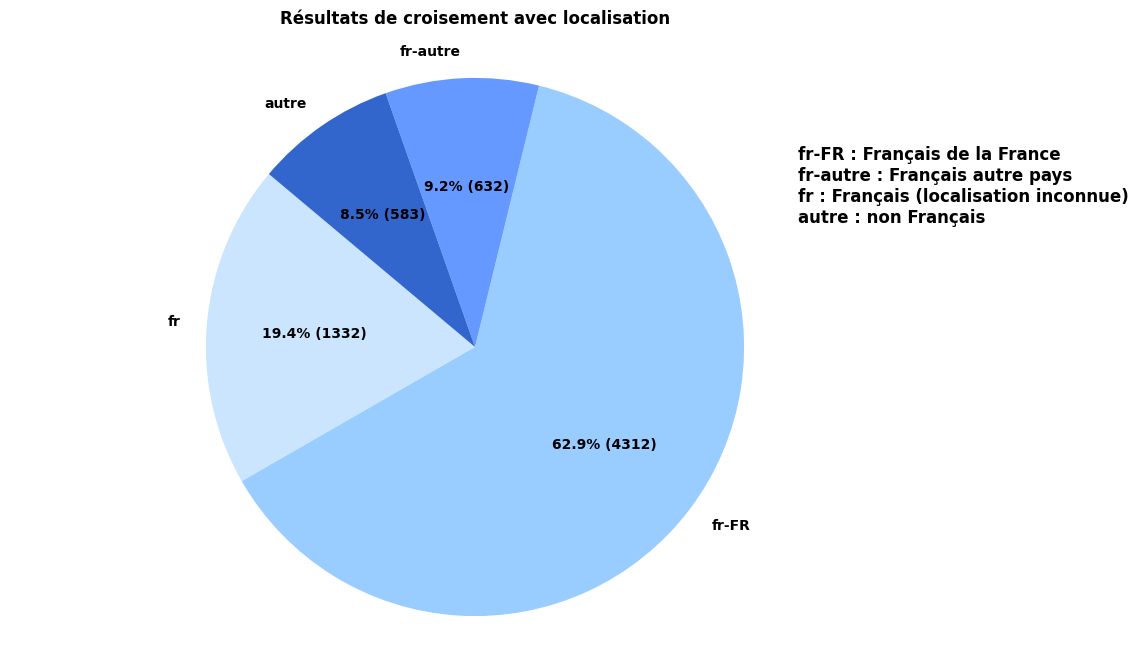

In [22]:
import matplotlib.pyplot as plt

total = len(videosR2)

count_fr = sum(1 for video in videosR2 if video['langue'] == 'fr')
count_frFR = sum(1 for video in videosR2 if video['langue'] == 'fr-FR')
count_fr_autre = sum(1 for video in videosR2 if video['langue'].startswith('fr') and video['langue'] not in ['fr', 'fr-FR'])
count_autre = total - (count_fr + count_frFR + count_fr_autre)

labels = ['fr', 'fr-FR', 'fr-autre', 'autre']
sizes = [count_fr, count_frFR, count_fr_autre, count_autre]

colors = ['#cce5ff', '#99ccff', '#6699ff', '#3366cc']

def make_label(pct, allvals):
    absolute = int(round(pct / 100. * total))
    return f'{pct:.1f}% ({absolute})'

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: make_label(p, sizes),
        startangle=140, textprops={'fontweight': 'bold'})
plt.axis('equal')

plt.title("Résultats de croisement avec localisation", fontweight='bold', pad=20)

plt.subplots_adjust(top=0.85)

# Ajouter les explications à côté du graphique
plt.text(1.2, 0.6, "fr-FR : Français de la France\nfr-autre : Français autre pays\nfr : Français (localisation inconnue)\nautre : non Français",
         fontsize=12, fontweight='bold', va='center')

plt.show()


In [23]:
4312+1332+632

6276

## Refining 3

- Get the localisation information for 'fr' videos :
  - Try to explore the video description+Title and Bio of the corresponding channel.

### 0.Test GLiNER

In [9]:
context = """
Le Panier Tout Vert – Un Projet de circuit court collectif en jardinage maraîcher

Bonjour à toutes et à tous, passionnés d’agroécologie, Sandra et Christian sont ravis de partager Le Panier Tout Vert.

 Depuis 2021, ils transforment un hectare de terrain à La Trimouille, appelé CASAVERDI, en un espace de jardinage maraîcher agroécologique intégré.

 Le Panier Tout Vert est un projet associatif de jardinage maraîcher avec pour objectifs :

- Approvisionner des familles, des cantines et restaurants, en légumes et de fruits cultivés sans engrais ni pesticides;

- Offrir des situations de travail ( salarié bénévole,  stage et de volontaire) aux personnes sans emploi,en  reconversion professionnelle ou formation 

- Acuccueillir des campeurs écolominimaliste,  woofers,  scouts, 

Que vous soyez passionné, curieux ou en reconversion professionnelle, Le Panier Tout Vert vous invite à rejoindre une communauté dynamique.

Merci de nous suivre, et à très bientôt pour de nouvelles aventures !      
"""

In [11]:
from gliner import GLiNER

NER = GLiNER.from_pretrained("urchade/gliner_multi-v2.1")
labels = [
    "Localisation",
    "Ville",
    "Commune",
    "Pays",
    "Zone géographique",
    "Continent",
    "Région",
    "Département",
    "Code postal",
    "Quartier",
    "Adresse",
    "Lieu-dit",
    "Coordonnées GPS",
    "Latitude",
    "Longitude",
    "Territoire",
    "Aire urbaine",
    "Zone rurale",
    "Zone urbaine",
    "Périmètre géographique",
    "Localité",
]
entities = NER.predict_entities(context, labels)

for entity in entities:
    print(entity["text"], "=>", entity["label"], "=>",entity["score"])


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


La Trimouille => Localité => 0.5965201258659363
CASAVERDI => Localisation => 0.5714259147644043


### 1.Seperate Channels with unknown country 

In [ ]:
channels = openJson("../../collecting/jsons/channels.json")
len(channels)

3309

In [13]:
channels_location_Unknown = []
for channel in channels :
    if channel['localisation']=="":
        channels_location_Unknown.append(channel)

saveJson("../jsons/channels_location_Unknown.json",channels_location_Unknown)
len(channels_location_Unknown)


 json saved


1077

### 2.Refine Channels Locations

In [ ]:
from filtering.scripts.utils1 import RefineAllChannels

In [14]:
RefineAllChannels()

Channels-Locations Refining...:   3%|▎         | 30/1077 [00:47<14:02,  1.24it/s] 

Error with GeoCoding


Channels-Locations Refining...:   9%|▉         | 100/1077 [02:43<23:16,  1.43s/it] 


 json saved


Channels-Locations Refining...:  18%|█▊        | 192/1077 [05:09<24:31,  1.66s/it]

Error with GeoCoding


Channels-Locations Refining...:  19%|█▊        | 200/1077 [05:31<20:34,  1.41s/it]  


 json saved


/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 397 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  19%|█▉        | 205/1077 [05:42<26:36,  1.83s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 838 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  19%|█▉        | 207/1077 [05:48<31:07,  2.15s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 11347 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  21%|██      


 json saved


/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 451 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  29%|██▊       | 308/1077 [09:00<27:13,  2.12s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 679 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  31%|███       | 329/1077 [09:27<08:10,  1.53it/s]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 17903 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  35%|███▍    


 json saved


Channels-Locations Refining...:  38%|███▊      | 405/1077 [11:14<15:25,  1.38s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 456 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  39%|███▊      | 416/1077 [11:33<18:45,  1.70s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 778 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  40%|████      | 432/1077 [12:10<29:55,  2.78s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 2305 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)


 json saved


Channels-Locations Refining...:  48%|████▊     | 518/1077 [14:25<11:08,  1.20s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 453 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  49%|████▉     | 533/1077 [14:49<15:18,  1.69s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 412 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  53%|█████▎    | 575/1077 [15:41<06:19,  1.32it/s]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 738 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


Channels-Locations Refining...:  58%|█████▊    | 624/1077 [16:49<12:49,  1.70s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 386 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  58%|█████▊    | 626/1077 [16:53<13:07,  1.75s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 552 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  58%|█████▊    | 630/1077 [17:02<15:21,  2.06s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 472 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


Channels-Locations Refining...:  67%|██████▋   | 723/1077 [19:39<10:13,  1.73s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 385 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  68%|██████▊   | 737/1077 [19:58<06:55,  1.22s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 497 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  69%|██████▉   | 742/1077 [20:10<14:27,  2.59s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 401 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


Channels-Locations Refining...:  76%|███████▌  | 821/1077 [22:29<14:29,  3.40s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 549 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  81%|████████  | 867/1077 [23:23<02:40,  1.31it/s]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 753 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  82%|████████▏ | 885/1077 [23:43<04:14,  1.33s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 920 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)}


 json saved


/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 550 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  84%|████████▎ | 901/1077 [24:15<05:47,  1.98s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 1188 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  84%|████████▍ | 909/1077 [24:29<05:47,  2.07s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 523 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  85%|████████▌


 json saved


Channels-Locations Refining...:  93%|█████████▎| 1002/1077 [26:51<03:16,  2.61s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 1213 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  93%|█████████▎| 1006/1077 [26:59<02:09,  1.82s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 391 has been truncated to 384
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
Channels-Locations Refining...:  95%|█████████▌| 1024/1077 [27:37<01:23,  1.57s/it]/teamspace/studios/this_studio/AgroTube/.venv/lib/python3.10/site-packages/gliner/data_processing/processor.py:296: UserWarning: Sentence of length 557 has been truncated to 384
  warnings.warn(f"Sentence of length {len(toke


 json saved


- Temps moyenne de processus avec CPU 

In [16]:
channels_location_Unknown = openJson("../jsons/channels_location_Unknown.json")
localisation_times = [
    chaine['localisationTime(s)']
    for chaine in channels_location_Unknown
    if 'localisationTime(s)' in chaine and isinstance(chaine['localisationTime(s)'], (int, float))
]

if localisation_times:
    moyenne = sum(localisation_times) / len(localisation_times)
    print(f"Temps moyen de localisation : {moyenne:.2f} secondes")
else:
    print("Aucun temps de localisation valide trouvé.")

Temps moyen de localisation : 1.61 secondes


### 3.Refine the videos

#### Create channelsR1.json

To insert the New locations on the original file

In [11]:
channels = openJson("../../collecting/jsons/channels.json")
channels_location_Unknown = openJson("../jsons/channels_location_Unknown.json")
print(len(channels))
print(len(channels_location_Unknown))

3309
1077


In [7]:
def returnLocation(channelId):
    for channel in channels_location_Unknown:
        if channel['id_chaine']==channelId:
            return channel['localisation']

In [8]:
for channel in tqdm(channels):
    if channel['localisation'] == "":
        channel['localisation']  = returnLocation(channel['id_chaine'])

saveJson("../jsons/channelsR1.json",channels)

100%|██████████| 3309/3309 [00:00<00:00, 13607.15it/s]



 json saved


In [14]:
channelsR1 = openJson("../jsons/channelsR1.json")
len(channelsR1)

3309

- Before

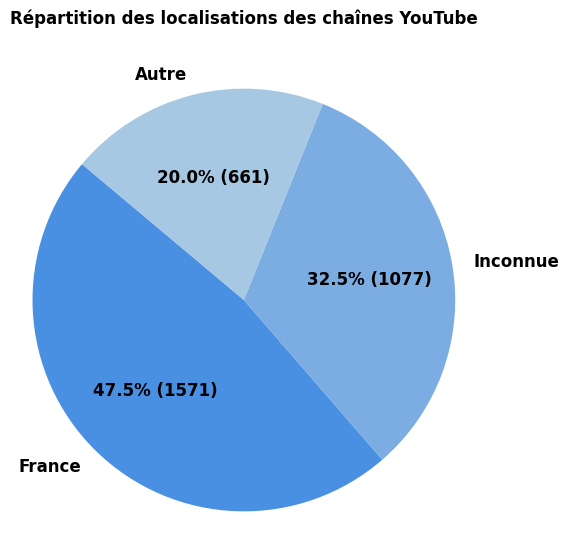

In [13]:
import matplotlib.pyplot as plt

locations = [channel.get('localisation', '').strip() for channel in channels if 'localisation' in channel]
counts = {'FR': 0, 'Inconnue': 0, 'Autre': 0}
for loc in locations:
    if loc == 'FR':
        counts['FR'] += 1
    elif loc == '':
        counts['Inconnue'] += 1
    else:
        counts['Autre'] += 1

labels = ['France', 'Inconnue', 'Autre']
sizes = [counts['FR'], counts['Inconnue'], counts['Autre']]
colors = ['#4A90E2', '#7BADE2', '#A6C8E2']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({count})'
    return my_autopct

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=make_autopct(sizes),
    startangle=140
)

for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Répartition des localisations des chaînes YouTube', fontsize=12, fontweight='bold', y=1.08)
plt.axis('equal')
plt.show()


- After

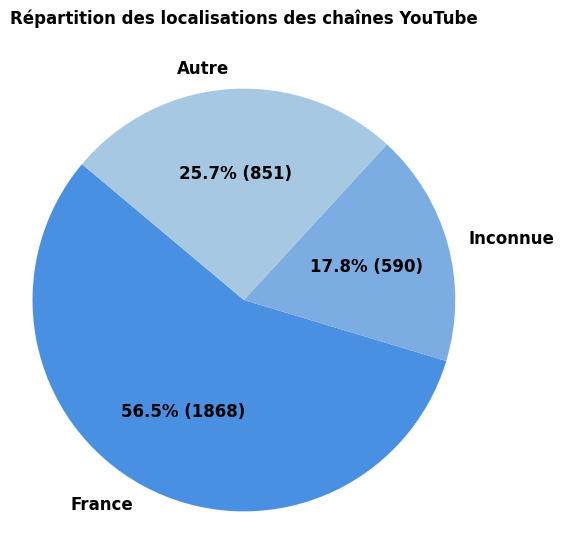

In [15]:
import matplotlib.pyplot as plt

locations = [channel.get('localisation', '').strip() for channel in channelsR1 if 'localisation' in channel]
counts = {'FR': 0, 'Inconnue': 0, 'Autre': 0}
for loc in locations:
    if loc == 'FR':
        counts['FR'] += 1
    elif loc == '':
        counts['Inconnue'] += 1
    else:
        counts['Autre'] += 1

labels = ['France', 'Inconnue', 'Autre']
sizes = [counts['FR'], counts['Inconnue'], counts['Autre']]
colors = ['#4A90E2', '#7BADE2', '#A6C8E2']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({count})'
    return my_autopct

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=make_autopct(sizes),
    startangle=140
)

for text in texts:
    text.set_fontweight('bold')
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.title('Répartition des localisations des chaînes YouTube', fontsize=12, fontweight='bold', y=1.08)
plt.axis('equal')
plt.show()


In [19]:
32.5-17.8

14.7

#### Create videosR3.json


In [32]:
from utils1 import RefineLanguage3

In [33]:
RefineLanguage3()

Refining3...: 100%|██████████| 6859/6859 [00:00<00:00, 317378.03it/s]



 json saved


In [34]:
videosR3 = openJson("../jsons/videosR3.json")
len(videosR3)

6859

In [35]:
langue_counter = Counter(video['langue'] for video in videosR3)
print("Toutes les valeurs uniques de langue avec leur nombre d'occurrences :")
for langue, count in sorted(langue_counter.items(), key=lambda x: x[1], reverse=True):
    print(f"- {langue} : {count}")


Toutes les valeurs uniques de langue avec leur nombre d'occurrences :
- fr-FR : 4722
- fr : 686
- autre : 583
- fr-CA : 276
- fr-BE : 130
- fr-CH : 97
- fr-US : 69
- fr-MA : 39
- fr-TD : 18
- fr-PT : 18
- fr-GB : 16
- fr-NL : 15
- fr-NC : 14
- fr-CM : 14
- fr-IT : 13
- fr-DE : 12
- fr-BF : 12
- fr-SN : 9
- fr-RE : 8
- fr-ES : 8
- fr-CI : 6
- fr-MQ : 6
- fr-DZ : 5
- fr-AR : 5
- fr-AU : 5
- fr-ET : 4
- fr-MU : 3
- fr-NE : 3
- fr-HT : 3
- fr-LU : 3
- fr-ML : 3
- fr-ZA : 2
- fr-IN : 2
- fr-RO : 2
- fr-PF : 2
- fr-TN : 2
- fr-MX : 2
- fr-CN : 2
- fr-TH : 2
- fr-BR : 2
- fr-SE : 2
- fr-GP : 2
- fr-AE : 2
- fr-CD : 2
- fr-IR : 1
- fr-TR : 1
- fr-TG : 1
- fr-CR : 1
- fr-HK : 1
- fr-DK : 1
- fr-RU : 1
- fr-MC : 1
- fr-SA : 1
- fr-PL : 1
- fr-KE : 1
- fr-UG : 1
- fr-KR : 1
- fr-GN : 1
- fr-TW : 1
- fr-AT : 1
- fr-IE : 1
- fr-VN : 1
- fr-PE : 1
- fr-LK : 1
- fr-ID : 1
- fr-BJ : 1
- fr-CU : 1
- fr-KH : 1
- fr-PH : 1
- fr-BA : 1
- fr-JP : 1
- fr-LB : 1


In [36]:
total = len(videosR3)

count_fr = sum(1 for video in videosR3 if video['langue'] == 'fr')
count_frFR = sum(1 for video in videosR3 if video['langue'] == 'fr-FR')
count_fr_autre = sum(1 for video in videosR3 if video['langue'].startswith('fr') and video['langue'] not in ['fr', 'fr-FR'])
count_autre = total - (count_fr + count_frFR + count_fr_autre)

print(f"Total de vidéos : {total}")
print(f"- fr       : {count_fr} ({count_fr / total:.2%})")
print(f"- fr-FR    : {count_frFR} ({count_frFR / total:.2%})")
print(f"- fr-autre : {count_fr_autre} ({count_fr_autre / total:.2%})")
print(f"- autre    : {count_autre} ({count_autre / total:.2%})")

Total de vidéos : 6859
- fr       : 686 (10.00%)
- fr-FR    : 4722 (68.84%)
- fr-autre : 868 (12.65%)
- autre    : 583 (8.50%)


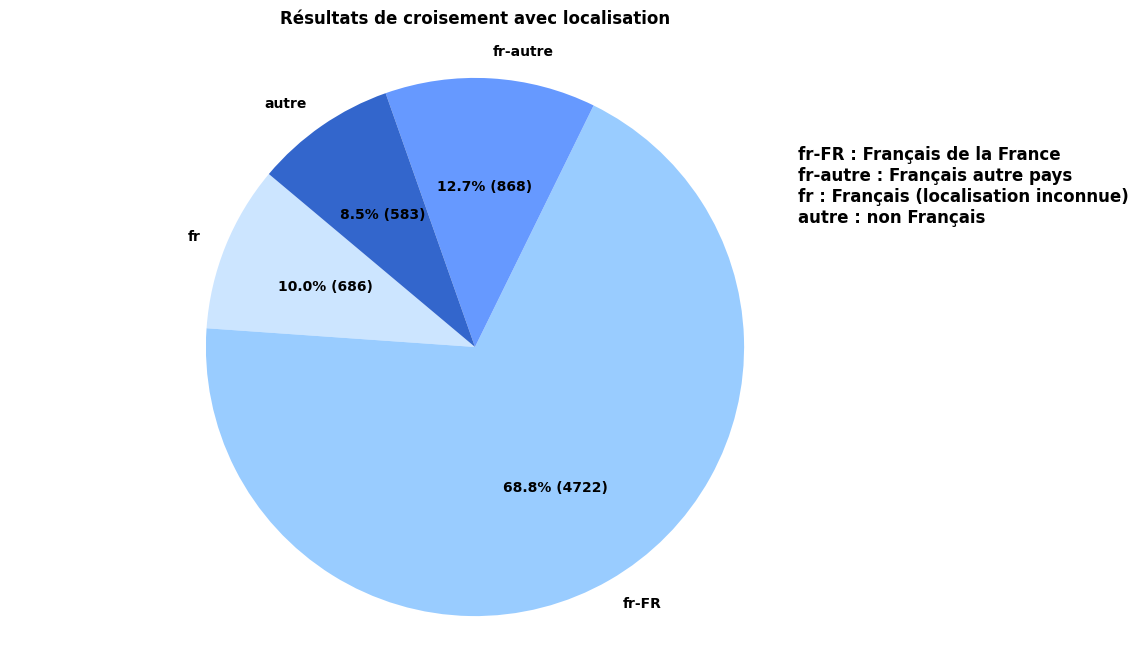

In [37]:
import matplotlib.pyplot as plt

total = len(videosR3)

count_fr = sum(1 for video in videosR3 if video['langue'] == 'fr')
count_frFR = sum(1 for video in videosR3 if video['langue'] == 'fr-FR')
count_fr_autre = sum(1 for video in videosR3 if video['langue'].startswith('fr') and video['langue'] not in ['fr', 'fr-FR'])
count_autre = total - (count_fr + count_frFR + count_fr_autre)

labels = ['fr', 'fr-FR', 'fr-autre', 'autre']
sizes = [count_fr, count_frFR, count_fr_autre, count_autre]

colors = ['#cce5ff', '#99ccff', '#6699ff', '#3366cc']

def make_label(pct, allvals):
    absolute = int(round(pct / 100. * total))
    return f'{pct:.1f}% ({absolute})'

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: make_label(p, sizes),
        startangle=140, textprops={'fontweight': 'bold'})
plt.axis('equal')

plt.title("Résultats de croisement avec localisation", fontweight='bold', pad=20)

plt.subplots_adjust(top=0.85)

# Ajouter les explications à côté du graphique
plt.text(1.2, 0.6, "fr-FR : Français de la France\nfr-autre : Français autre pays\nfr : Français (localisation inconnue)\nautre : non Français",
         fontsize=12, fontweight='bold', va='center')

plt.show()


- Remove fr-autre,autre
- keep only fr and fr-FR , a big amount of fr are for france.
- obtain the localisation of a channel if it's not providled by youtube api can be complexe because you can't find it anywhere.